# 1. 라이브러리 불러오기

In [62]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# 2. 학습된 모델(Pre-Trained) 불러오기

In [64]:
cnn_model = tf.keras.models.load_model('CNN_epochs(10)_20250519_v1.0.h5')

In [65]:
cnn_model.summary() # 모르는 모델을 알아보기.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

# 3. 데이터 불러오기

In [66]:
# 이미지 불러오기
image = Image.open('new_4.jpg')

In [67]:
# 이미지를 흑백으로 변환
image = image.convert('L')

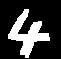

In [68]:
image

# 4. 인공지능이 들어갈 수 있는 형태로 변환

In [83]:
# 인공지능이 들어갈 데이터 형태로 변환
# data = np.ndarray(shape=(1, 28, 28, 1), dtype=np.float32)
# 현재 이미지는 61 x 59의 크기를 28 x 28 크기로 조정
size = (28, 28)
image = ImageOps.fit(image, size, Image.LANCZOS)

In [84]:
image

In [85]:
# 이미지를 image_array 변수에 복사
image_array = np.array(image) # 넘파이에 뭐 해야 조작가능

In [86]:
type(image_array)

numpy.ndarray

In [87]:
type(image)

PIL.Image.Image

In [88]:
# 전처리
nor_image_array = (image_array.astype(np.float32) / 255.) # 정규화, float32:실수
data = nor_image_array

In [89]:
data.shape # 정규화는 했으나, 데이터 형태가 모델과 맞지않다.

(28, 28)

In [90]:
data

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.01176471, 0.00392157, 0.        ,
        0.        , 0.    

In [91]:
# 인공지능이 들어갈 수 있는 형태로 shape 구조를 변경
image_data = data.reshape(1, 28, 28, 1)
image_data.shape

(1, 28, 28, 1)

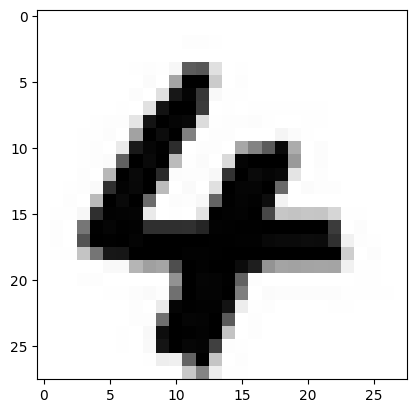

In [92]:
plt.imshow(image, cmap='Greys')

# 5. 예측(Predict)

In [93]:
result = cnn_model.predict(image_data)

1/1 [==============================] - 0s 16ms/step


In [94]:
num_result = np.argmax(result)

In [95]:
print("실제 이미지 예측 결과 = %d" % (num_result))

실제 이미지 예측 결과 = 1
